# Explanatory notebook - Project B - Airbnbs in New York City

#### 02806 - Social data analysis and visualization F21

## 1. Motivation

Over the years more people are choosing to rent Airbnb's when traveling. The uniqueness of Airbnb's is that it gives the customers the opportunitets to experience the destination in a more authentic and personalized way. Today, Airbnb has become a one of a kind service, that is used and recognized by the whole world. This makes it possible for the Airbnb's to collect and provide data based on millions of listings. Data that can be analyzed and used for used for different purposes like understanding customers choices and the host's' behavior.

 
The idea of this webpage is to show some interesting findings of the hosts' behavior of the Airbnb's in New York City by showing how they make use of this platform. Also, our goal is to give you an idea about what to expect from New York Airbnb's in terms of price, types, location, etc.
We want to explore, visualize and make predictions on this data to give you some insights of this business.


The data used for analyzing is from Kaggle [1] and from NYC Open Data [2].

## 2. Basic Stats

The data consist of 48895 observations and 16 attributes. The attributes can be divided into four categories;



**Host information**, which contains:

* ID of host

* Name of host

* Number of listings per host



**Listing information**, which contains:

* ID of listing

* Name of listing

* Type of listing

* Minimum number of nights

* Number of days the listing is available within 365 days (availability).

* Price of listing



**Review information**, which contains:

* Number of reviews

* Date of latest review

* Number of reviews per month


and **Location information**, which contains:

* Name of region

* Name of district

* Latitude coordinates

* Longitude coordinates

Here is what the dataset looks like:

In [174]:
import pandas as pd

data = pd.read_csv('AB_NYC_2019.csv')
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Here is the list of the attributes names in the data as well as the number of attributes and number of observations.

In [175]:
# The attribute names of data
print("The attribute names are:")
for column in data.columns:
  print(column)

# Number of attributes in data
print("\nThe number of attributes is: ", len(data.columns))

# Number of examples in data
print("\nBefore cleaning the data, the number of listings is: ", len(data))

The attribute names are:
id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365

The number of attributes is:  16

Before cleaning the data, the number of listings is:  48895


We see that we have 16 attributes and 48895 observations. 

### 2.1 Attributes

Lets have a deeper look of some of the attributes.

For the analysis we want to have a closer look at the boroughs in New York. This is represented in the $neighbourhood\_group$ attribute. We list them below.

In [176]:
for borough in data.neighbourhood_group.unique():
  print(borough)

Brooklyn
Manhattan
Queens
Staten Island
Bronx


To make some cool visualizations we need to install several packages.

In [177]:
#!apt update
#!apt upgrade
#!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
#!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from shapely import wkt

import warnings
warnings.filterwarnings("ignore")

  Cloning git://github.com/geopandas/geopandas.git to c:\users\bruger\appdata\local\temp\pip-req-build-w_s4krb7


  Running command git clone -q git://github.com/geopandas/geopandas.git 'C:\Users\Bruger\AppData\Local\Temp\pip-req-build-w_s4krb7'


In [178]:
#use the NYC borough boundary data that is available in geopandas datasets
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [179]:
#set the CRS so geopandas knows how to interpret the coordinates
nyc = nyc.to_crs(epsg=4326)

Here we display how the boroughs of New York are divided in a map.

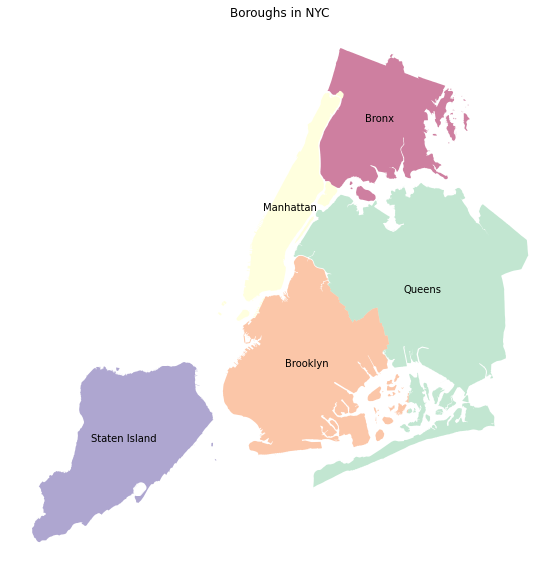

In [180]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
#plot regions
nyc.plot(column='BoroName', cmap='Spectral', alpha=0.5, ax=ax)
#add region names
nyc.apply(lambda x: ax.annotate(s=x.BoroName, color='black', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title("Boroughs in NYC")
plt.axis('off')
plt.show()

The city can also be divided into smaller neighbourhoods represented in the attribute $neighbourhood\_group$.

In [181]:
len(data.neighbourhood.unique())

221

There are 221 such neighbourhoods in the whole city.

There are different types of Airbnbs listed in New York. Here is the list of the types from the attribute $room\_type$:

In [182]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

The Airbnbs consist of private rooms, entire homes/apartments, and shared rooms.

### 2.2 Data cleaning

Checking for missing values in the data.

In [183]:
# Check the number of nulls in each field
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For the visualisations we choose to remove the listings that do not have a name and those that do not have a host name. When performing the machine learning we make a more elaborating data cleaning (data preprocessing, see data analysis section).

In [184]:
# removing observations where name and host_names are missing
data = data[pd.notnull(data['name'])]
data = data[pd.notnull(data['host_name'])]

In [185]:
# number of observations in data after cleaning
print("After cleaning the data, the number of listings is: ", len(data))

After cleaning the data, the number of listings is:  48858


## 3. Data Analysis

### 3.1 The story

First we plot the position of Airbnbs on a NYC map.

Web map tiles are typically provided in Web Mercator (EPSG 3857), so we need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map:

In [186]:
#use the NYC borough boundary data that is available in geopandas datasets
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
#set the CRS so geopandas knows how to interpret the coordinates
nyc = nyc.to_crs(epsg=4326)
nyc.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

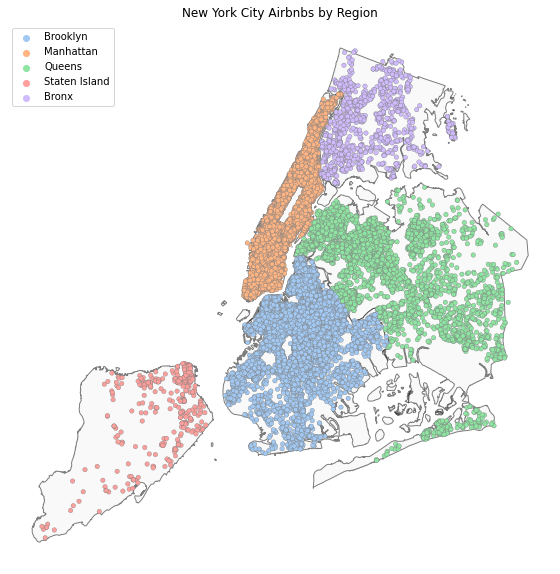

In [187]:
ax = nyc.plot(figsize=(20, 10), color='whitesmoke', alpha=0.5, edgecolor='k')
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=data, palette='pastel', edgecolor='gray')
ax.set_title('New York City Airbnbs by Region')
ax.legend(loc='upper left')
ax.set_axis_off()

This plot gives a good idea of the Airbnb positions, but we can notice an important concentration of points in Manhattan and Brooklyn. To avoid overplotting and to be able to see where the number of airbnbs is highest, have a look at the plot below.

In [188]:
#count the number of airbnbs in the different regions/boroughs
listings_by_region = data.groupby('neighbourhood_group').id.count().reset_index()
listings_by_region

neighbourhood_group     id
0               Bronx   1089
1            Brooklyn  20089
2           Manhattan  21643
3              Queens   5664
4       Staten Island    373

In [189]:
map_merge_listings = nyc.merge(listings_by_region, left_on='BoroName', right_on='neighbourhood_group')
map_merge_listings.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry neighbourhood_group  \
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...       Staten Island   
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...              Queens   
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...            Brooklyn   
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...           Manhattan   
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...               Bronx   

      id  
0    373  
1   5664  
2  20089  
3  21643  
4   1089

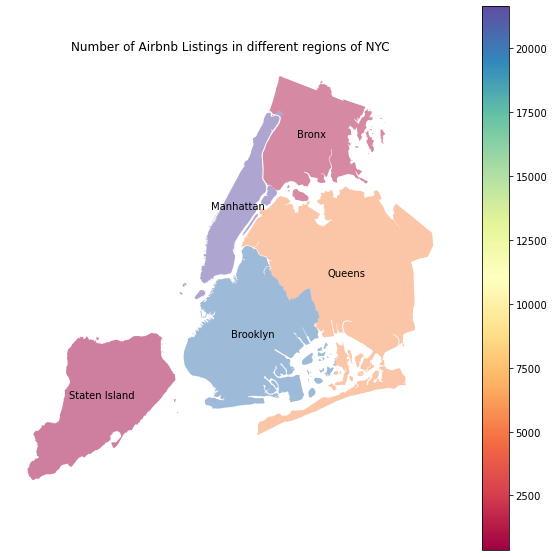

In [190]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
map_merge_listings.plot(column='id', cmap='Spectral', alpha=0.5, ax=ax, legend=True)
#add region names
map_merge_listings.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='black', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.title("Number of Airbnb Listings in different regions of NYC")
plt.axis('off')
plt.show()

Manhattan and Brooklyn have the highest number of Airbnbs. However, these regions are very vast, so it may be interesting to see in what neighbourhood the Airbnbs are concentrated.

#### 3.1.1 Location of Airbnbs

We want to plot the number of Airbnbs in each neighbourhood of the 5 boroughs of New York to see how the Airbnbs are located.

For that, we will need the geometric properties of the neighbourhoods. Therefore, we will import a new CSV file from the NYC Open Data Site.

In [191]:
nbhoods = pd.read_csv('nynta.csv')
nbhoods.head()

the_geom  CountyFIPS  BoroCode  \
0  MULTIPOLYGON (((-73.97604935657381 40.63127590...          47         3   
1  MULTIPOLYGON (((-73.80379022888246 40.77561011...          81         4   
2  MULTIPOLYGON (((-73.8610972440186 40.763664477...          81         4   
3  MULTIPOLYGON (((-73.75725671443085 40.71813860...          81         4   
4  MULTIPOLYGON (((-73.95859278495766 40.61040303...          47         3   

   BoroName NTACode        NTAName    Shape_Leng    Shape_Area  
0  Brooklyn    BK88   Borough Park  39247.227831  5.400502e+07  
1    Queens    QN51    Murray Hill  33266.904872  5.248828e+07  
2    Queens    QN27  East Elmhurst  19816.712132  1.972685e+07  
3    Queens    QN07         Hollis  20976.335781  2.288777e+07  
4  Brooklyn    BK25      Homecrest  27514.022918  2.999197e+07

In [192]:
type(nbhoods.the_geom[0])

str

We need to convert the geometry column from str to object in order to be able to plot the boundaries of the neighbourhoods.

In [193]:
nbhoods['geometry'] = nbhoods['the_geom'].apply(wkt.loads)
#delete the_geom column
nbhoods = nbhoods.drop(columns=['the_geom'])
type(nbhoods.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [194]:
#convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = geopandas.GeoDataFrame(nbhoods, geometry='geometry')
nbhoods.head()

CountyFIPS  BoroCode  BoroName NTACode        NTAName    Shape_Leng  \
0          47         3  Brooklyn    BK88   Borough Park  39247.227831   
1          81         4    Queens    QN51    Murray Hill  33266.904872   
2          81         4    Queens    QN27  East Elmhurst  19816.712132   
3          81         4    Queens    QN07         Hollis  20976.335781   
4          47         3  Brooklyn    BK25      Homecrest  27514.022918   

     Shape_Area                                           geometry  
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1  5.248828e+07  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2  1.972685e+07  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3  2.288777e+07  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...  
4  2.999197e+07  MULTIPOLYGON (((-73.95859 40.61040, -73.95828 ...

This is what the neighbourhoods look like:

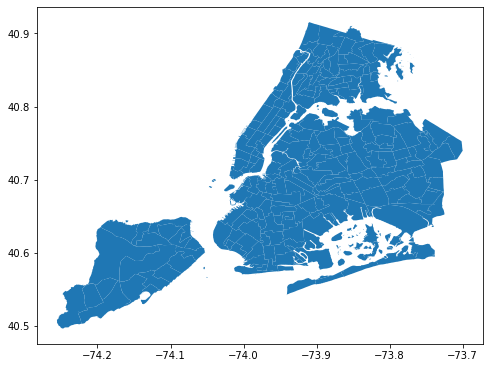

In [195]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
nbhoods.plot(ax=ax)
plt.show()

In [196]:
#count the number of airbnbs per neighbourhood
nbhood_count = data.groupby('neighbourhood').id.count().reset_index()
nbhood_count.head()

neighbourhood   id
0       Allerton   42
1  Arden Heights    4
2       Arrochar   21
3        Arverne   77
4        Astoria  900

In [197]:
#merge the counts with the dataframe containing the geometric properties of the neighbourhoods
map_listings = nbhoods.merge(nbhood_count, left_on='NTAName', right_on='neighbourhood')
map_listings.head()

CountyFIPS  BoroCode  BoroName NTACode        NTAName    Shape_Leng  \
0          47         3  Brooklyn    BK88   Borough Park  39247.227831   
1          81         4    Queens    QN51    Murray Hill  33266.904872   
2          81         4    Queens    QN27  East Elmhurst  19816.712132   
3          81         4    Queens    QN07         Hollis  20976.335781   
4          81         4    Queens    QN08     St. Albans  45401.316980   

     Shape_Area                                           geometry  \
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
1  5.248828e+07  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   
2  1.972685e+07  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   
3  2.288777e+07  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...   
4  7.741275e+07  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   

   neighbourhood   id  
0   Borough Park  136  
1    Murray Hill  485  
2  East Elmhurst  185  
3         Hollis   14  
4     St. Albans   76

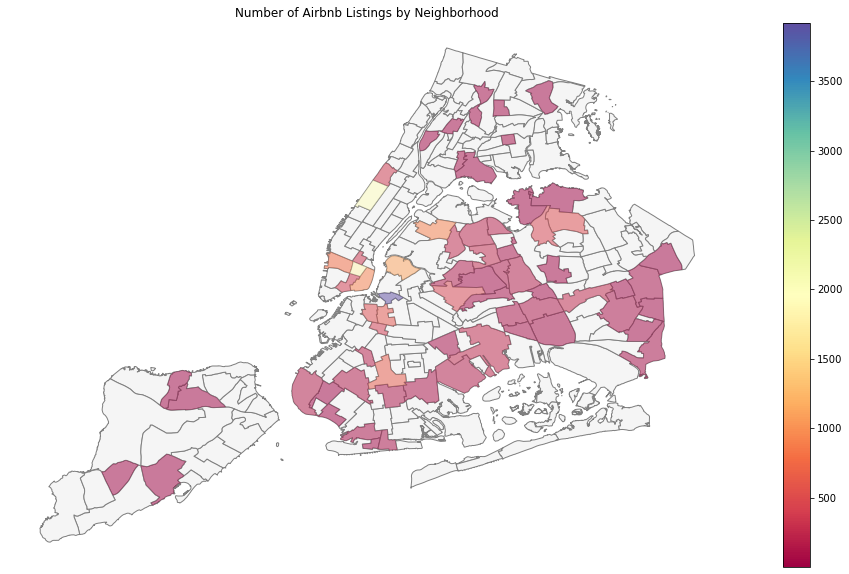

In [198]:
fig,ax = plt.subplots(1,1, figsize=(20,10))
plt.title("Number of Airbnb Listings by Neighborhood")
map_neighbourhoods = nbhoods.plot(color='whitesmoke', edgecolor='gray', ax=ax)
map_listings.plot(column='id', cmap='Spectral',alpha=0.5, ax=map_neighbourhoods, legend=True)
plt.axis('off')
plt.show()

There is a lot of missing data (white regions), so we conclude that the neighbourhood names differ in the two CSV files. The plan is to create a point of each Airbnb location from its longitude and latitude, and see what neighbourhood from the new csv file it intersects. This is done by a spatial join.

In [199]:
#add a column named geometry with the location of the airbnb and convert the dataframe to a GeoDataFrame
data = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

                     geometry  
0  POINT (-73.97237 40.64749)  
1  POINT (-73.98377 40.75362)  
2  POINT (-73.94190 40.80902)  
3  POINT (-73.95976 40.68514)  
4  POINT (-73.94399 40.79851)

Find the neighbourhood of the Airbnb by doing a spatial join. The Aribnb location must intersect the neighbourhood location.

In [200]:
merged = geopandas.sjoin(left_df=nbhoods,
                 right_df=data,
                 how="inner",
                 op="intersects")
merged.head()

CountyFIPS  BoroCode  BoroName NTACode       NTAName    Shape_Leng  \
0          47         3  Brooklyn    BK88  Borough Park  39247.227831   
0          47         3  Brooklyn    BK88  Borough Park  39247.227831   
0          47         3  Brooklyn    BK88  Borough Park  39247.227831   
0          47         3  Brooklyn    BK88  Borough Park  39247.227831   
0          47         3  Brooklyn    BK88  Borough Park  39247.227831   

     Shape_Area                                           geometry  \
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   

   index_right        id  ...  latitude  longitude     room_type price  \
0        36358  28918768  ...  40.63522  -74.00596   Shared room    35   
0        40039  31090803  ...  40.63529  -74.00618  Private room    48   
0        36156  28738642  ...  40.63378  -74.00599  Private room    60   
0        36356  28918405  ...  40.63416  -74.00722  Private room    50   
0        20140  16134738  ...  40.61426  -73.97746  Private room    65   

  minimum_nights  number_of_reviews  last_review reviews_per_month  \
0              1                  0          NaN               NaN   
0              1                  2   2019-05-27              0.91   
0              1                  7   2019-06-04              0.76   
0              2                  0          NaN               NaN   
0              3                  8   2019-06-18              0.26   

   calculated_host_listings_count  availability_365  
0                              10               352  
0                               7               169  
0                               7               179  
0                              10               365  
0                               2                40  

[5 rows x 25 columns]

In [201]:
#count the number of airbnbs per neighbourhood
nbhood_count = merged.groupby('NTAName').id.count().reset_index()
nbhood_count.head()

NTAName   id
0                     Allerton-Pelham Gardens   50
1  Annadale-Huguenot-Prince's Bay-Eltingville    7
2                               Arden Heights    2
3                                     Astoria  776
4                                  Auburndale   15

In [202]:
#merge the counts with the dataframe containing the geometric properties of the neighbourhoods
map_counts = nbhoods.merge(nbhood_count, left_on='NTAName', right_on='NTAName')
map_counts.head()

CountyFIPS  BoroCode  BoroName NTACode        NTAName    Shape_Leng  \
0          47         3  Brooklyn    BK88   Borough Park  39247.227831   
1          81         4    Queens    QN51    Murray Hill  33266.904872   
2          81         4    Queens    QN27  East Elmhurst  19816.712132   
3          81         4    Queens    QN07         Hollis  20976.335781   
4          47         3  Brooklyn    BK25      Homecrest  27514.022918   

     Shape_Area                                           geometry  id  
0  5.400502e+07  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  71  
1  5.248828e+07  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  69  
2  1.972685e+07  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  76  
3  2.288777e+07  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...  22  
4  2.999197e+07  MULTIPOLYGON (((-73.95859 40.61040, -73.95828 ...  55

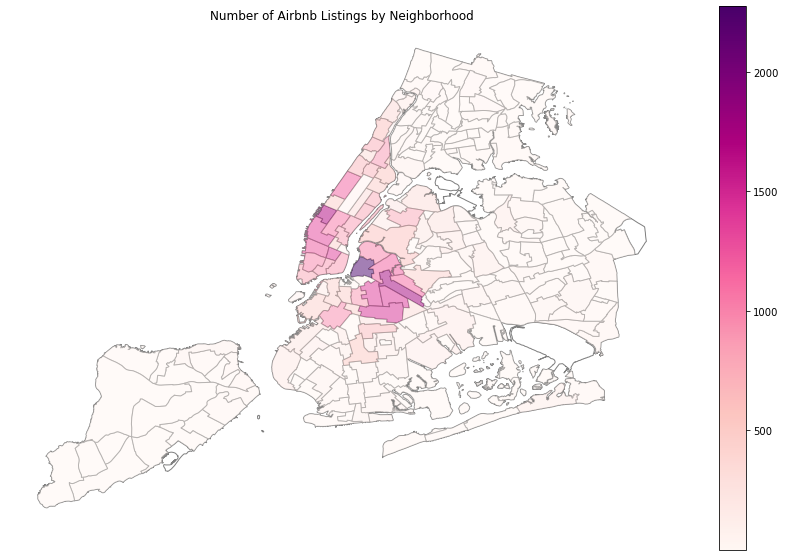

In [203]:
fig,ax = plt.subplots(1,1, figsize=(15,10))
plt.title("Number of Airbnb Listings by Neighborhood")
map_neighbourhoods = nbhoods.plot(color='white', edgecolor='gray', ax=ax)
map_counts.plot(column='id', cmap='RdPu',alpha=0.5, ax=map_neighbourhoods, legend=True)
plt.axis('off')
plt.show()

This time, we have very few regions with missing data (white regions). We can see that some neighbourhoods in Manhattan and Brooklyn have a high concentration of airbnbs. 

#### 3.1.2 Host of Airbnbs

Lets find top 5 hosts with most Airbnb in NYC.

We count the number of airbnbs for each host and display the top 5 ID's and corresponding number of listings.

In [204]:
top_5_hosts_listings=data.host_id.value_counts().head()
top_5_hosts_listings

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

We would like to have the names of the hosts as well, in a dataframe format.

In [205]:
#keep the host_id and host_name columns of the top 5 hosts + drop the duplicated rows
ids_names_litings = data.loc[data.host_id.isin(top_5_hosts_listings.index)][['host_id', 'host_name']].drop_duplicates()
#add the number of listings to the dataframe
ids_names_litings['listings'] = ids_names_litings['host_id'].map(top_5_hosts_listings.to_dict())
ids_names_litings = ids_names_litings.reset_index(drop=True)
ids_names_litings

host_id       host_name  listings
0   16098958  Jeremy & Laura        96
1   30283594            Kara       121
2  107434423      Blueground       232
3  137358866          Kazuya       103
4  219517861    Sonder (NYC)       327

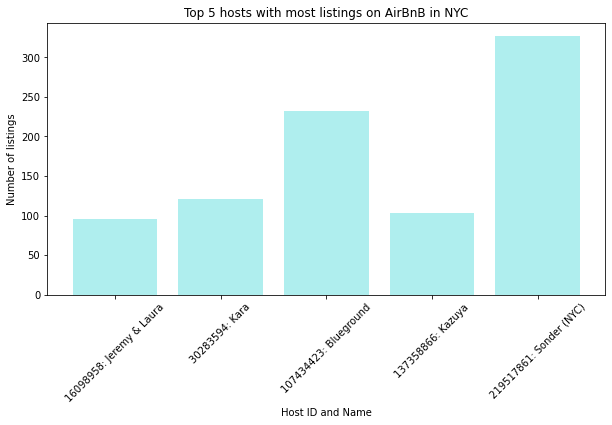

In [206]:
fig = plt.figure(figsize = (10, 5))
plt.xlabel('Host ID and Name')
plt.ylabel('Number of listings')
plt.title('Top 5 hosts with most listings on AirBnB in NYC')
plt.bar([str(id)+': '+str(name) for id, name in zip(ids_names_litings['host_id'], ids_names_litings['host_name'])], ids_names_litings.listings, color='paleturquoise')
plt.xticks(rotation=45)
plt.show()

It can be noticed that Sonder has more than 300 listings on Airbnb in New York.

Plot the positions of Sonder's Airbnbs.

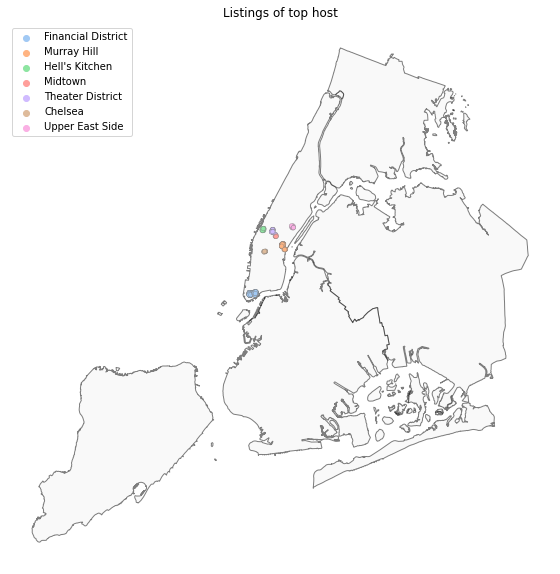

In [207]:
top_host_id = top_5_hosts_listings.index[0]
ax = nyc.plot(figsize=(15, 10), color='whitesmoke', alpha=0.5, edgecolor='k')
top_host_listings_positions = data[data.host_id == top_host_id][['longitude', 'latitude', 'neighbourhood']]
sns.scatterplot(x='longitude', y='latitude',s=20, data=top_host_listings_positions,  edgecolor='gray', hue='neighbourhood',palette='pastel')
ax.set_title('Listings of top host')
ax.legend(loc='upper left')
ax.set_axis_off()

All Airbnbs are situated in Manhattan, so let's zoom in.

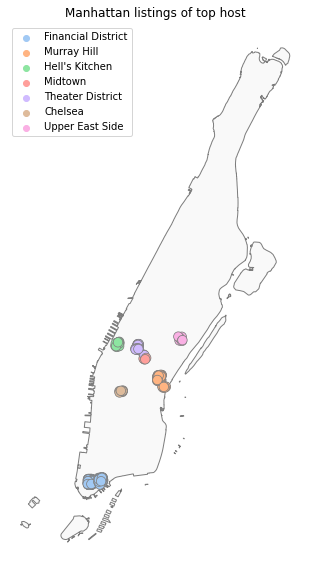

In [208]:
ax = nyc.loc[nyc['BoroName'] == 'Manhattan'].geometry.plot(figsize=(15, 10), color='whitesmoke', alpha=0.5, edgecolor='k')
sns.scatterplot(x='longitude', y='latitude',s=90, data=top_host_listings_positions,  edgecolor='gray', hue='neighbourhood',palette='pastel')
ax.set_title('Manhattan listings of top host')
ax.legend(loc='upper left')
ax.set_axis_off()

Looks like the top host owns several apartments in a given building. 

We print the names of the Airbnbs owned by the top host in Upper East Side and the Theater District.

In [209]:
upper_east_side_listings_top_host = data[ (data.host_id == top_host_id) & (data.neighbourhood=='Upper East Side')]['name']
print('Upper East Side listings:')
for listing in upper_east_side_listings_top_host:
  print(listing)

Upper East Side listings:
Sonder | Upper East Side | Chic 1BR + Sofa Bed
Sonder | Upper East Side | Airy 1BR + Gym
Sonder | Upper East Side | Airy 1BR + Gym
Sonder | Upper East Side | Chic 1BR + Sofa Bed
Sonder | Upper East Side | Stylish 1BR + Sofa Bed
Sonder | Upper East Side | Lovely 1BR + Gym


In [210]:
financial_district_listings_top_host = data[ (data.host_id == top_host_id) & (data.neighbourhood=='Theater District')]['name']
print('Theater District listings:')
for listing in financial_district_listings_top_host:
  print(listing)

Theater District listings:
Pleasant 1BR in Midtown East by Sonder
Sonder | The Biltmore | Sunny Studio + Rooftop
Sonder | The Biltmore | Cozy Studio + Kitchen
Sonder | Theater District | Airy 1BR + City View
Sonder | The Biltmore | Charming 1BR + Rooftop
Sonder | The Biltmore | Warm Studio + Rooftop
Sonder | The Biltmore | Cozy Studio + Rooftop
Sonder | The Biltmore | Serene 1BR + City View
Sonder | The Biltmore | Sunny 1BR + City View
Sonder | The Biltmore | Chic 1BR + City View
Sonder | The Biltmore | Stylish 1BR + Sofa Bed
Sonder | The Biltmore | Stunning 1BR + Sofa Bed
Sonder | The Biltmore | 1BR
Sonder | The Biltmore | Chic 1BR + City View
Sonder | The Biltmore | Spacious 1BR + Kitchen
Sonder | The Biltmore | Spacious 1BR + Kitchen
Sonder | The Biltmore | Modern 1BR + Rooftop
Sonder | The Biltmore | Spacious 1BR + Kitchen
Sonder | The Biltmore | Stunning 1BR + Sofa Bed
Sonder | The Biltmore | Bright 1BR + Workspace
Sonder | The Biltmore | Stunning 1BR + Sofa Bed
Sonder | The Biltm

Indeed, that looks to be the case.

After a little bit of googling, we found out that Sonder is an apartment-rental company that claims to combine the best parts of a hotel and a private home. Apparently, they use Airbnb as a platform to rent their apartments. This allows them to gain visibility in addition to their own platform www.sonder.com.

#### 3.1.3 Prices and availability of Airbnbs

Then we plot the average price per room type in the 5 boroughs of NYC.

In [211]:
mean_price_room_type_per_region = data.pivot_table(values='price', index='neighbourhood_group', columns='room_type', aggfunc='mean')
mean_price_room_type_per_region

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.645503     66.788344    58.610169
Brooklyn                  178.362609     76.510619    50.527845
Manhattan                 249.238211    116.805594    88.977083
Queens                    147.050573     71.776855    69.020202
Staten Island             173.846591     62.292553    57.444444

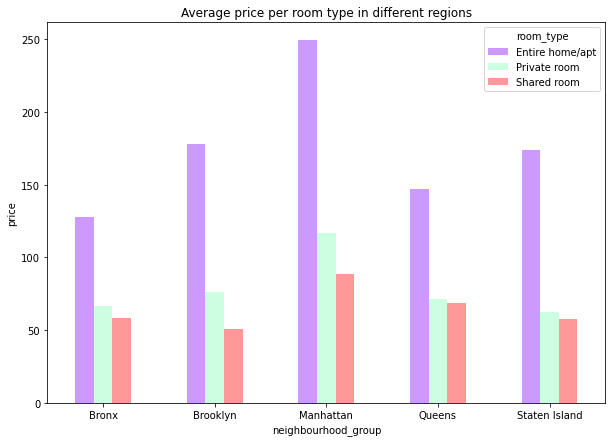

In [212]:
mean_price_room_type_per_region.plot(figsize=(10,7), kind='bar', cmap='rainbow', title='Average price per room type in different regions', rot=0, alpha =0.4)
plt.ylabel('price')
plt.show()

So Manhattan has the most expensive airbnbs.

Let's try to make this plot interactive.

In [213]:
import bokeh.palettes as c
from bokeh.io import output_notebook,show
from bokeh.io import output_file, show
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend

In [214]:
output_notebook()

Loading BokehJS ...

In [215]:
neighbourhoods = mean_price_room_type_per_region.index
#convert the Pandas Dataframe to Bokeh ColumnDataSource
source = ColumnDataSource(mean_price_room_type_per_region)
airbnb_type=data.room_type.unique()
#create an empty figure
color=c.viridis(len(airbnb_type))
p = figure(x_range = FactorRange(factors=neighbourhoods), plot_height=400,plot_width=800, title="Average price per room type in different regions",x_axis_label='Borough',y_axis_label='Price',
           toolbar_location=None, tools="")

bar = {} #for the bars
items = [] #for the custom legend

for indx,i in enumerate(airbnb_type):
  bar[i] = p.vbar(x='neighbourhood_group', top=i, source=source, 
                 muted_alpha=0.1, muted = True, muted_color = None, width=0.5, fill_alpha=0.2, color=color[indx]) 
  items.append((i, [bar[i]]))


legend = Legend(items=items, location='center_left')
p.add_layout(legend, 'left') 

#make the legend interactive and display the figure
p.legend.click_policy="mute" 
show(p)

Also lets see how the availability of the Airbnbs in Manhattan is.

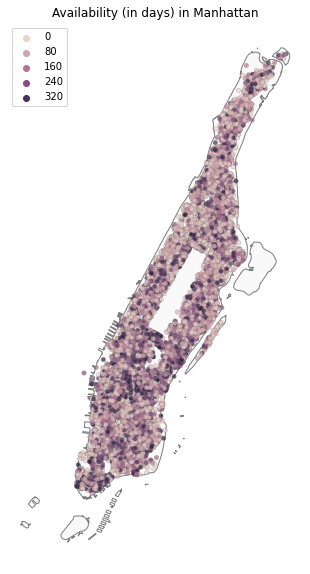

In [216]:
ax = nyc.loc[nyc['BoroName'] == 'Manhattan'].geometry.plot(figsize=(20, 10), color='whitesmoke', alpha=0.5, edgecolor='k')
Manhattan_data = data[data.neighbourhood_group=='Manhattan']
sns.scatterplot(x='longitude', y='latitude',s=20, data=Manhattan_data,  edgecolor='gray', hue='availability_365', alpha=0.7)
ax.set_title('Availability (in days) in Manhattan')
ax.legend(loc='upper left')
ax.set_axis_off()
plt.show()

As the color intesity is quite low, we conclude that a vast majority of the airbnbs in Manhattan are busy approximately all year round.

Show the top reviewed listings and compare their price with the average price of airbnbs in Manhattan

In [217]:
Manhattan_listings = data[data.neighbourhood_group=='Manhattan'][['name','host_name','latitude','longitude','neighbourhood','room_type','price','number_of_reviews','geometry']]
Manhattan_top_reviewed_listings = Manhattan_listings.sort_values(by=['number_of_reviews'], ascending=False).head(10).reset_index()
Manhattan_top_reviewed_listings

index                                      name host_name  latitude  \
0   2031                Great Bedroom in Manhattan        Jj  40.82085   
1   2030            Beautiful Bedroom in Manhattan        Jj  40.82124   
2   2015              Private Bedroom in Manhattan        Jj  40.82264   
3   1879  Manhattan Lux Loft.Like.Love.Lots.Look !     Carol  40.71921   
4    225       PRIVATE Room on Historic Sugar Hill     Agnes  40.82510   
5   1190          Cozy Room in Lively East Village      John  40.72760   
6   2163       TriBeCa 2500 Sq Ft w/ Priv Elevator       Jon  40.71927   
7   1125       PRIVATE Room in Spacious, Quiet Apt     Agnes  40.82537   
8      7          Large Furnished Room Near B'way   Shunichi  40.76489   
9   2092        East Village Gay Friendly Dbl Room      Seth  40.72836   

   longitude    neighbourhood        room_type  price  number_of_reviews  \
0  -73.94025           Harlem     Private room     49                607   
1  -73.93838           Harlem     Private room     49                597   
2  -73.94041           Harlem     Private room     49                594   
3  -73.99116  Lower East Side     Private room     99                540   
4  -73.94287           Harlem     Private room     60                458   
5  -73.98347     East Village     Private room     72                451   
6  -74.00453          Tribeca  Entire home/apt    575                447   
7  -73.94392           Harlem     Private room     85                439   
8  -73.98493   Hell's Kitchen     Private room     79                430   
9  -73.98163     East Village     Private room    100                414   

                     geometry  
0  POINT (-73.94025 40.82085)  
1  POINT (-73.93838 40.82124)  
2  POINT (-73.94041 40.82264)  
3  POINT (-73.99116 40.71921)  
4  POINT (-73.94287 40.82510)  
5  POINT (-73.98347 40.72760)  
6  POINT (-74.00453 40.71927)  
7  POINT (-73.94392 40.82537)  
8  POINT (-73.98493 40.76489)  
9  POINT (-73.98163 40.72836)

In [218]:
print("Top 10 reviewed listings in Manhattan:")
for index, top_reviewed_listing in Manhattan_top_reviewed_listings.iterrows():
  print(top_reviewed_listing.host_name + '\'s', top_reviewed_listing.room_type.lower(), 'at', top_reviewed_listing.price, '$/night', 'named', top_reviewed_listing['name'])

Top 10 reviewed listings in Manhattan:
Jj's private room at 49 $/night named Great Bedroom in Manhattan
Jj's private room at 49 $/night named Beautiful Bedroom in Manhattan
Jj's private room at 49 $/night named Private Bedroom in Manhattan
Carol's private room at 99 $/night named Manhattan Lux Loft.Like.Love.Lots.Look !
Agnes's private room at 60 $/night named PRIVATE Room on Historic Sugar Hill
John's private room at 72 $/night named Cozy Room in Lively East Village
Jon's entire home/apt at 575 $/night named TriBeCa 2500 Sq Ft w/ Priv Elevator
Agnes's private room at 85 $/night named PRIVATE Room in Spacious, Quiet Apt
Shunichi's private room at 79 $/night named Large Furnished Room Near B'way 
Seth's private room at 100 $/night named East Village Gay Friendly Dbl Room


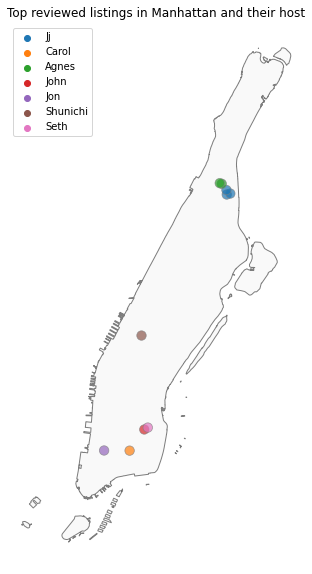

In [219]:
ax = nyc.loc[nyc['BoroName'] == 'Manhattan'].geometry.plot(figsize=(20, 10), color='whitesmoke', alpha=0.5, edgecolor='k')
sns.scatterplot(x='longitude', y='latitude',s=90, data=Manhattan_top_reviewed_listings, edgecolor='gray', alpha=0.7, hue='host_name')
ax.set_title('Top reviewed listings in Manhattan and their host')
ax.set_axis_off()
ax.legend(loc='upper left')
plt.show()

In [220]:
print("Mean price of private rooms in Manhattan:", np.ceil(np.mean(Manhattan_data[Manhattan_data.room_type=='Private room'].price)),'$/night')

Mean price of private rooms in Manhattan: 117.0 $/night


Looks like the top 3 most reviewed airbnbs in Manhattan belong to Jj. All 3 are private rooms, most probably in Jj's apartment. Also, note that they are relatively inexpensive compared to the mean price of private rooms in Manhattan: the rooms cost 49 \$/night and the mean is approximately 117 \$/night. 

#### 3.1.4 Naming strategy of Airbnbs

We plot a wordcloud that shows the most words in the Airbnb names in Manhattan.

In [221]:
from wordcloud import WordCloud

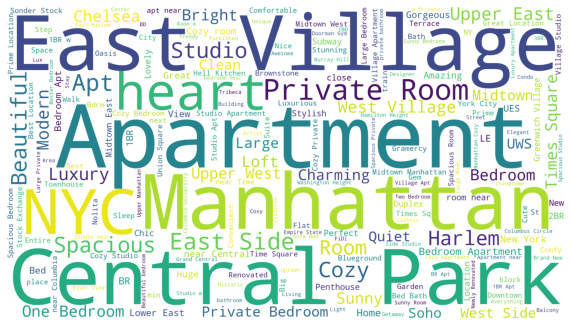

In [222]:
plt.figure(figsize=(10,10))
#text with all airbnb names
text = " ".join(str(name) for name in Manhattan_data.name)
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Use the Manhattan map as a shape for the wordcloud.

In [223]:
from PIL import Image

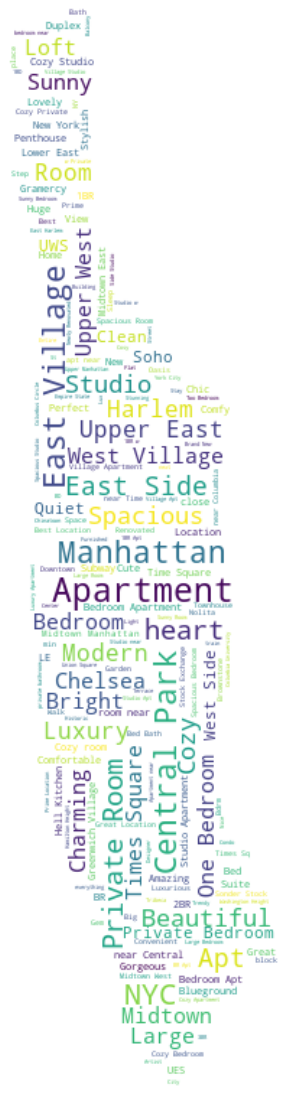

In [224]:
plt.figure( figsize=(10,20))
mask = np.array(Image.open('Manhattan.png'))

wordcloud = WordCloud(
                      background_color='white',
                      width=2560,
                      height=1600,
                      mask=mask
                      ).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The hosts use key words like NYC, Manhattan, Central Park, East Side, etc. in order to draw attention to the position of the listing. They also use adjectives like Private, Beautiful, Cozy, Charming, Modern, Spacious, etc. to describe the listings and give a good impression.

### 3.2 Machine learning for price prediction

#### 3.2.1 Data preprocessing

We will preprocess the data so it is ready for performing machine learning.

In [225]:
# import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [226]:
# importing the data
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Looking for missing values in the data.

In [227]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The missing values placed in the $name$ and $host\_name$ are replaced with zero, as these are categorical attributes. The $last\_review$ and $reviews\_per\_month$ contain too many missing values, so these will be removed entirely from the data.

In [228]:
# replacing missing values with 0
data = data.replace(np.nan,0)

# removing last_review and reviews_per_month
data.drop(['last_review'],axis=1, inplace=True)
data.drop(['reviews_per_month'],axis=1, inplace=True)

We also need to look at some outliers. We know that one clear outlier is that the prices of the Airbnbs cannot be zero. Therefore we remove the observations with price=0.

In [229]:
no_rows_with_zero_price = len(data[data.price == 0])
print("Number of rows with zero price:",no_rows_with_zero_price)

data = data[data.price != 0].copy()
print("New data shape:",data.shape)

Number of rows with zero price: 11
New data shape: (48884, 14)


Now we have no missing values in the dataframe:

In [230]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now we want to see some basic statistcs of the price:

In [231]:
data.describe().iloc[:,4:5]

price
count  48884.000000
mean     152.755053
std      240.170260
min       10.000000
25%       69.000000
50%      106.000000
75%      175.000000
max    10000.000000

We see that the mean price is $153\$$, that the maximum price is $10000\$$ and the minimum price is $10\$$. We also see a large standard deviation.   

We want to see the distributions of the numerical attributes to be able to see if some transformation is needed to be applied. This we show with density plots.

[Text(0, 0.5, 'Density')]

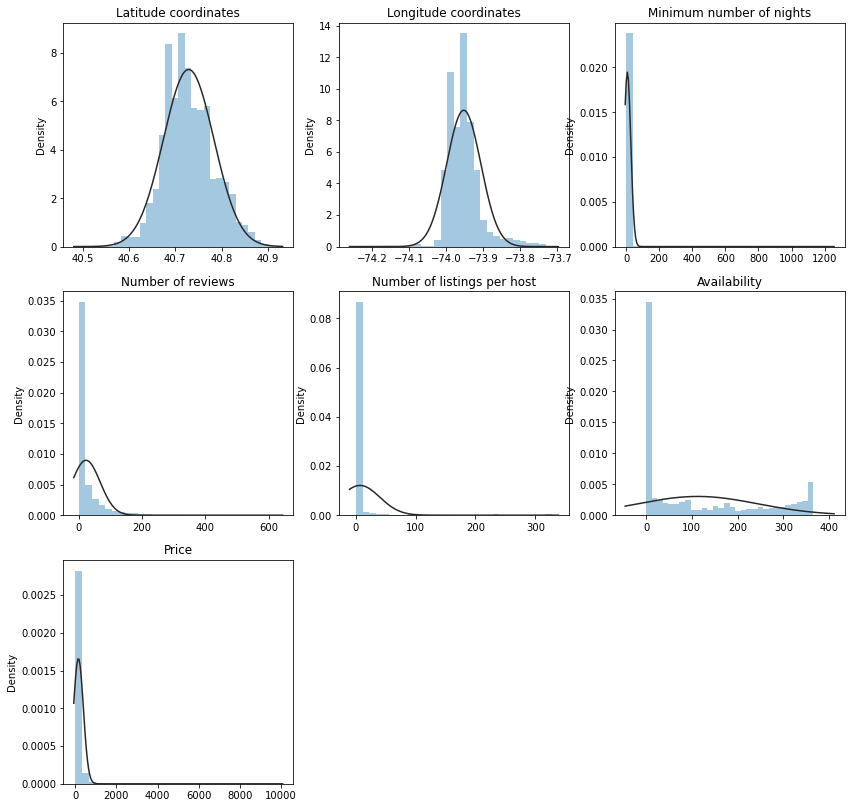

In [232]:
# listing the numerical attribtues
numeric_vars = data.columns.tolist()[6:8]+data.columns.tolist()[9:]

from scipy.stats import norm

# plotting the density plots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)

g1 = sns.distplot(data[numeric_vars[0]], fit=norm, kde=False, ax=ax1, bins=30)
g1.set(title='Latitude coordinates')
g1.set(xlabel=None)
g1.set(ylabel='Density')

g2 = sns.distplot(data[numeric_vars[1]], fit=norm, kde=False, ax=ax2, bins=30)
g2.set(title='Longitude coordinates')
g2.set(xlabel=None)
g2.set(ylabel='Density')

g3 = sns.distplot(data[numeric_vars[3]], fit=norm, kde=False, ax=ax3, bins=30)
g3.set(title='Minimum number of nights')
g3.set(xlabel=None)
g3.set(ylabel='Density')

g4 = sns.distplot(data[numeric_vars[4]], fit=norm, kde=False, ax=ax4, bins=30)
g4.set(title='Number of reviews')
g4.set(xlabel=None)
g4.set(ylabel='Density')

g5 = sns.distplot(data[numeric_vars[5]], fit=norm, kde=False, ax=ax5, bins=30)
g5.set(title='Number of listings per host')
g5.set(xlabel=None)
g5.set(ylabel='Density')

g6 = sns.distplot(data[numeric_vars[6]], fit=norm, kde=False, ax=ax6, bins=30)
g6.set(title='Availability')
g6.set(xlabel=None)
g6.set(ylabel='Density')

g7 = sns.distplot(data[numeric_vars[2]], fit=norm, kde=False, ax=ax7, bins=30)
g7.set(title='Price')
g7.set(xlabel=None)
g7.set(ylabel='Density')

Logarithmic transformation was used for the numeric columns variables to smooth out the distributions for those attributes which are right skewed.

In [233]:
#separate numerical variables
a=pd.DataFrame(data.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]

# making logarithmic transformation
for num in numeric_vars[3:]:
    data["log_("+num+" +1)"] = np.log(data[num]+1)
data["log_price"] = np.log(data.price)
data=data.drop(columns = numeric_vars[2:]).copy()

# updating numeric_vars
numeric_vars = data.columns.tolist()[6:8]+data.columns.tolist()[9:]

Checking the correlations between the numeric attributes with a correlation matrix.

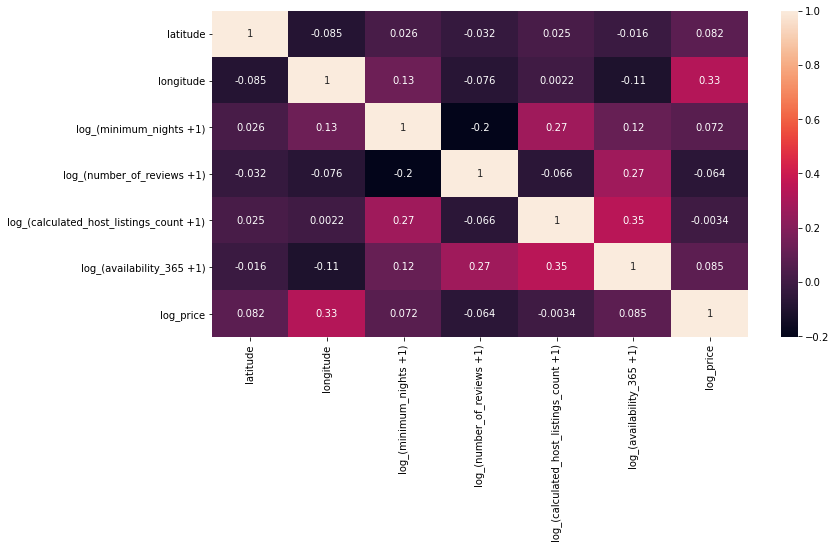

In [234]:
fig = plt.figure(figsize=(12, 6))
x=data[numeric_vars].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

Observation on price: 
- Price is positively correlated with longitude.
- Availability_365, latitude, minimum_nights are also having positive effect on the price.
- Price is negatively correlated with number_of_reviews

Now let's see how non numerical variables are related with the price.




We know that location is an important parameter in predicting the price. Also we know that room type is important. Therfore we choose to one-hot-encode $neighborhood$, $neighborhood\_group$ and $room_type$

In [235]:
data = pd.concat([data, pd.get_dummies(data["neighbourhood"], drop_first=False)], axis=1)
data.drop(['neighbourhood'],axis=1, inplace=True)
print("Now data shape:", data.shape)

Now data shape: (48884, 234)


In [236]:
data = pd.concat([data, pd.get_dummies(data["neighbourhood_group"], drop_first=False)], axis=1)
data.drop(['neighbourhood_group'],axis=1, inplace=True)
print("Now data shape:", data.shape)

Now data shape: (48884, 238)


In [237]:
data = pd.concat([data, pd.get_dummies(data["room_type"], drop_first=False)], axis=1)
data.drop(['room_type'],axis=1, inplace=True)
print("Now data shape:", data.shape)

Now data shape: (48884, 240)


In [238]:
data

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name  latitude  longitude  log_(minimum_nights +1)  \
0               John  40.64749  -73.97237                 0.693147   
1           Jennifer  40.75362  -73.98377                 0.693147   
2          Elisabeth  40.80902  -73.94190                 1.386294   
3        LisaRoxanne  40.68514  -73.95976                 0.693147   
4              Laura  40.79851  -73.94399                 2.397895   
...              ...       ...        ...                      ...   
48890        Sabrina  40.67853  -73.94995                 1.098612   
48891        Marisol  40.70184  -73.93317                 1.609438   
48892  Ilgar & Aysel  40.81475  -73.94867                 2.397895   
48893            Taz  40.75751  -73.99112                 0.693147   
48894     Christophe  40.76404  -73.98933                 2.079442   

       log_(number_of_reviews +1)  log_(calculated_host_listings_count +1)  \
0                        2.302585                                 1.945910   
1                        3.828641                                 1.098612   
2                        0.000000                                 0.693147   
3                        5.602119                                 0.693147   
4                        2.302585                                 0.693147   
...                           ...                                      ...   
48890                    0.000000                                 1.098612   
48891                    0.000000                                 1.098612   
48892                    0.000000                                 0.693147   
48893                    0.000000                                 1.945910   
48894                    0.000000                                 0.693147   

       log_(availability_365 +1)  ...  Woodrow  Woodside  Bronx  Brooklyn  \
0                       5.902633  ...        0         0      0         1   
1                       5.874931  ...        0         0      0         0   
2                       5.902633  ...        0         0      0         0   
3                       5.273000  ...        0         0      0         1   
4                       0.000000  ...        0         0      0         0   
...                          ...  ...      ...       ...    ...       ...   
48890                   2.302585  ...        0         0      0         1   
48891                   3.610918  ...        0         0      0         1   
48892                   3.332205  ...        0         0      0         0   
48893                   1.098612  ...        0         0      0         0   
48894                   3.178054  ...        0         0      0         0   

       Manhattan  Queens  Staten Island  Entire home/apt  Private room  \
0              0       0              0                0             1   
1              1       0              0                1             0   
2              1       0              0                0             1   
3              0       0              0              

Now we drop the unnecessary columns, which we are not using in the machine learning approach to predict the price.

In [239]:
data_ = data.drop(['id', 'name','host_id','host_name','log_(calculated_host_listings_count +1)'], axis=1).copy()

In [240]:
#target variable columns 
target = data_['log_price'].copy()
#strip the target column from input columns and put it in front
data_ = data_.drop(['log_price'], axis=1).copy()
data_ = pd.concat([target, data_], axis=1).copy()
#select input variable columns
nums = data_.iloc[:,1:]

Final dataframe which will be using for price prediction is following:

In [241]:
data_

log_price  latitude  longitude  log_(minimum_nights +1)  \
0       5.003946  40.64749  -73.97237                 0.693147   
1       5.416100  40.75362  -73.98377                 0.693147   
2       5.010635  40.80902  -73.94190                 1.386294   
3       4.488636  40.68514  -73.95976                 0.693147   
4       4.382027  40.79851  -73.94399                 2.397895   
...          ...       ...        ...                      ...   
48890   4.248495  40.67853  -73.94995                 1.098612   
48891   3.688879  40.70184  -73.93317                 1.609438   
48892   4.744932  40.81475  -73.94867                 2.397895   
48893   4.007333  40.75751  -73.99112                 0.693147   
48894   4.499810  40.76404  -73.98933                 2.079442   

       log_(number_of_reviews +1)  log_(availability_365 +1)  Allerton  \
0                        2.302585                   5.902633         0   
1                        3.828641                   5.874931         0   
2                        0.000000                   5.902633         0   
3                        5.602119                   5.273000         0   
4                        2.302585                   0.000000         0   
...                           ...                        ...       ...   
48890                    0.000000                   2.302585         0   
48891                    0.000000                   3.610918         0   
48892                    0.000000                   3.332205         0   
48893                    0.000000                   1.098612         0   
48894                    0.000000                   3.178054         0   

       Arden Heights  Arrochar  Arverne  ...  Woodrow  Woodside  Bronx  \
0                  0         0        0  ...        0         0      0   
1                  0         0        0  ...        0         0      0   
2                  0         0        0  ...        0         0      0   
3                  0         0        0  ...        0         0      0   
4                  0         0        0  ...        0         0      0   
...              ...       ...      ...  ...      ...       ...    ...   
48890              0         0        0  ...        0         0      0   
48891              0         0        0  ...        0         0      0   
48892              0         0        0  ...        0         0      0   
48893              0         0        0  ...        0         0      0   
48894              0         0        0  ...        0         0      0   

       Brooklyn  Manhattan  Queens  Staten Island  Entire home/apt  \
0             1          0       0              0                0   
1             0          1       0              0                1   
2             0          1       0              0                0   
3             1          0       0              0                1   
4             0          1       0              0                1   
...         ...        ...     ...            ...              ...   
48890         1          0       0              0                0   
48891         1          0       0              0                0   
48892         0          1       0              0                1   
48893         0          1       0              0                0   
48894         0          1       0              0                0   

       Private room  Shared room  
0                 1            0  
1                 0            0  
2                 1            0  
3                 0            0  
4                 0            0  
...             ...          ...  
48890             1            0  
48891             1            0  
48892             0            0  
48893             0            1  
48894             1            0  

[48884 rows x 235 columns]

#### 3.2.2 Machine Learning algorithms

Now its time to apply machine learning algorithms 

In [242]:
#import modules:
import seaborn as sns
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score

In [243]:
y= target
x = nums
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

In [244]:
x

latitude  longitude  log_(minimum_nights +1)  \
0      40.64749  -73.97237                 0.693147   
1      40.75362  -73.98377                 0.693147   
2      40.80902  -73.94190                 1.386294   
3      40.68514  -73.95976                 0.693147   
4      40.79851  -73.94399                 2.397895   
...         ...        ...                      ...   
48890  40.67853  -73.94995                 1.098612   
48891  40.70184  -73.93317                 1.609438   
48892  40.81475  -73.94867                 2.397895   
48893  40.75751  -73.99112                 0.693147   
48894  40.76404  -73.98933                 2.079442   

       log_(number_of_reviews +1)  log_(availability_365 +1)  Allerton  \
0                        2.302585                   5.902633         0   
1                        3.828641                   5.874931         0   
2                        0.000000                   5.902633         0   
3                        5.602119                   5.273000         0   
4                        2.302585                   0.000000         0   
...                           ...                        ...       ...   
48890                    0.000000                   2.302585         0   
48891                    0.000000                   3.610918         0   
48892                    0.000000                   3.332205         0   
48893                    0.000000                   1.098612         0   
48894                    0.000000                   3.178054         0   

       Arden Heights  Arrochar  Arverne  Astoria  ...  Woodrow  Woodside  \
0                  0         0        0        0  ...        0         0   
1                  0         0        0        0  ...        0         0   
2                  0         0        0        0  ...        0         0   
3                  0         0        0        0  ...        0         0   
4                  0         0        0        0  ...        0         0   
...              ...       ...      ...      ...  ...      ...       ...   
48890              0         0        0        0  ...        0         0   
48891              0         0        0        0  ...        0         0   
48892              0         0        0        0  ...        0         0   
48893              0         0        0        0  ...        0         0   
48894              0         0        0        0  ...        0         0   

       Bronx  Brooklyn  Manhattan  Queens  Staten Island  Entire home/apt  \
0          0         1          0       0              0                0   
1          0         0          1       0              0                1   
2          0         0          1       0              0                0   
3          0         1          0       0              0                1   
4          0         0          1       0              0                1   
...      ...       ...        ...     ...            ...              ...   
48890      0         1          0       0              0                0   
48891      0         1          0       0              0                0   
48892      0         0          1       0              0                1   
48893      0         0          1       0              0                0   
48894      0         0          1       0              0                0   

       Private room  Shared room  
0                 1            0  
1                 0            0  
2                 1            0  
3                 0            0  
4                 0            0  
...             ...          ...  
48890             1            0  
48891             1            0  
48892             0            0  
48893             0            1  
48894             1            0  

[48884 rows x 234 columns]

**Decision Tree Regression - kfold**

In [245]:
rmse_dt=[]
dt = DecisionTreeRegressor()
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(dt ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_dt.append(avg_rmse)
print("Root mean square error: " +str(round(rmse_dt[0],3)))

Root mean square error: 0.617


**Random Forest Regression** - **kfold**

In [246]:
rmse_rf=[]
rf=RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=2)
kf = KFold(5, shuffle = True, random_state=1)
mse = cross_val_score(rf ,x,y, scoring = "neg_mean_squared_error", cv=kf) 
rmse = np.sqrt(np.absolute(mse))
avg_rmse = np.sum(rmse)/len(rmse)
rmse_rf.append(avg_rmse)
print("Root mean square error: " +str(round(rmse_rf[0],3)))


Root mean square error: 0.447


Random Forest model shows a lower Root mean square error than Decision Tree model. Thats why we chose the Random Forest model for the price prediction of NYC Airbnb. 

Now let's see some insights with Random Forest model price prediction. We can see some top most important feature which influences the price prediction on our machine learning model.



In [247]:
rf.fit(X_train,y_train)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Number of important features: "+str(feature_importances[feature_importances["importance"]!=0].shape[0]))
print("\nTop fifteen features by importance:")
feature_importances[feature_importances["importance"]!=0].head(15)

Number of important features: 210

Top fifteen features by importance:


importance
Entire home/apt               0.411767
longitude                     0.156647
latitude                      0.144414
log_(availability_365 +1)     0.083920
log_(number_of_reviews +1)    0.062669
log_(minimum_nights +1)       0.052094
Manhattan                     0.036030
Midtown                       0.007180
Shared room                   0.006418
Bedford-Stuyvesant            0.002067
Private room                  0.001828
Williamsburg                  0.001478
Tribeca                       0.001369
Astoria                       0.001238
Hell's Kitchen                0.001119

## 4. Genre

We have presented our results in a magazine style, as we think that this is a good way for providing all the background information about the data, analyse it as well as visualize it. We have chosen to make some of the images in slideshow style, as this makes the user interesting in participating in the storytelling and not only look at what is displayed. We have also made one interactive visualizations to include the reader further.

We have tried to implement the Martini Glass structure in the story telling, as we want to tell the story in the right order and then in the end, it will be possible for the reader to make some independent choices. We introduces the webpage with a motivation for why this story is interesting to read more about. We do this to capture the interest of the reader and so the reader know, what to expect from the rest of the webpage. In the beginning of the story telling we make it broad, to get the overveiw of the story. Then moving further into the analysis we have digg deeper into some parts that we found interesting. Then we have chosen to put the price prediction (machine lerning part) in a seperate section, so the reader can choose for themselves, if one find it interesting to read more about. 

We think this is a good way of communicating the story as it provides a clear path, where all the necessary information for understanding the data is provided, and then afterwards the reader has the opportunity to make some independent choices of what other information he or she  wants to receive.



## 5. Visualizations

This part shows some of the plots already shown section 3. Data analysis, but here it is explained, why they are included in the story and what they show in order to tell the story.

To give an idea of the data we're working with, we made a plot of the Airbnb positions in NY.

In [248]:
from IPython.display import Image

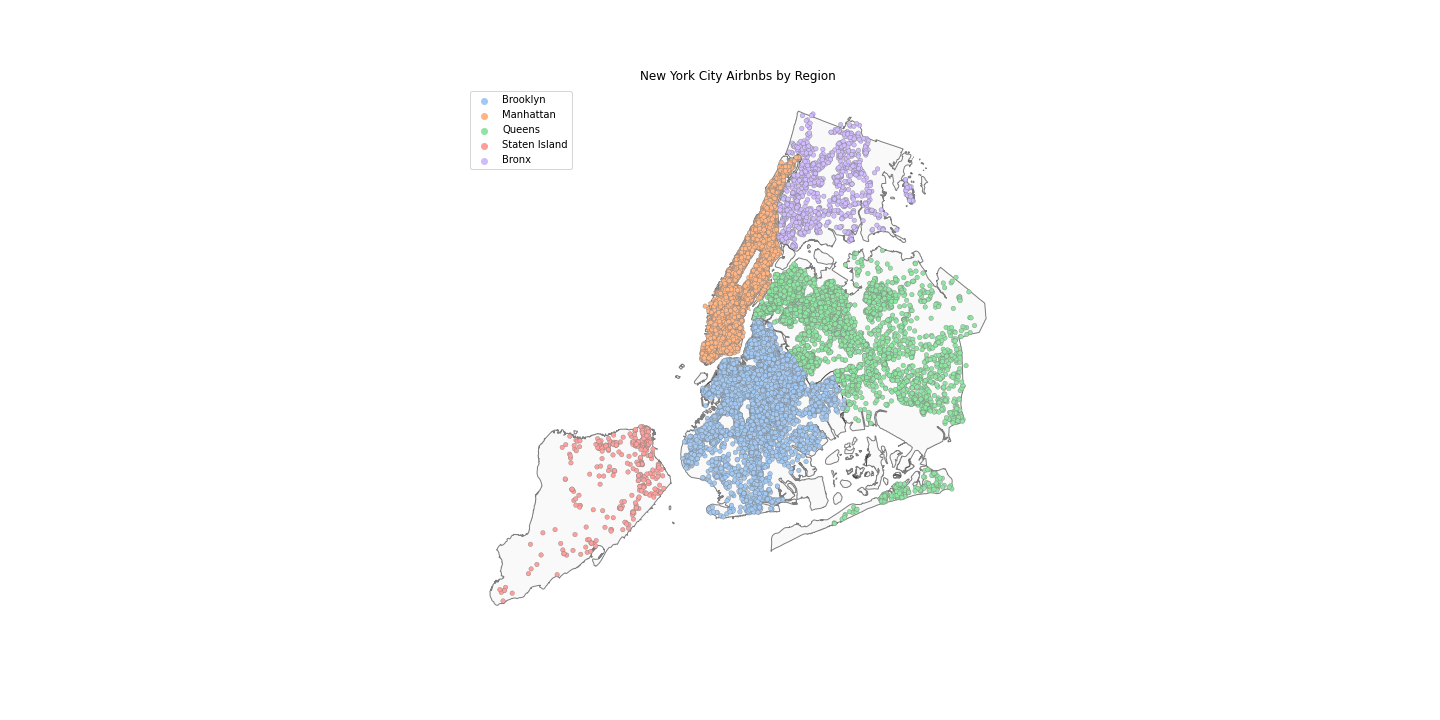

In [249]:
Image('position_airbnbs.png')

In order to avoid overplotting, we made a second plot which illustrates the concentration of airbnbs in the different regions of New York. 

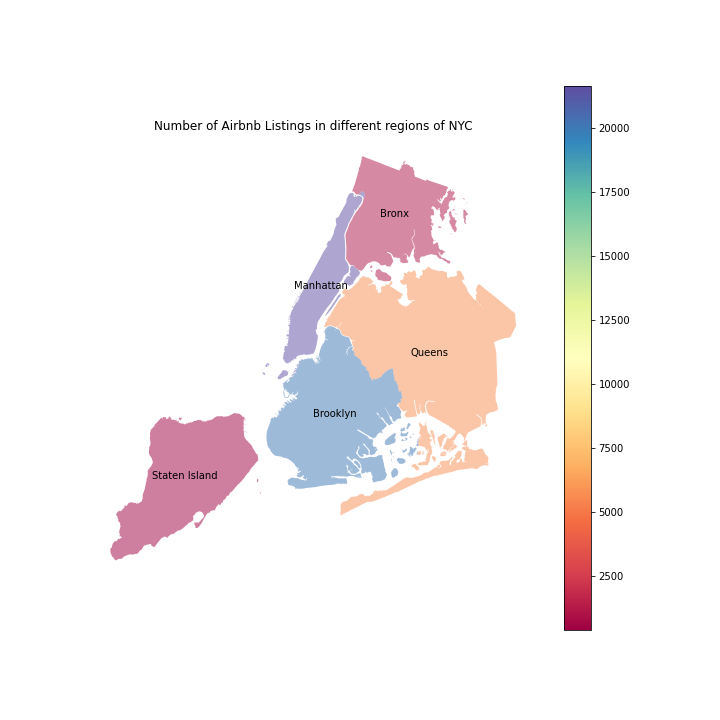

In [250]:
Image('nr_listings_by_region.png')

These two plots served as an introduction to the dataset and the story that we want to tell. 

The next visualisation helps us to better understand the host's and customer's behaviour.

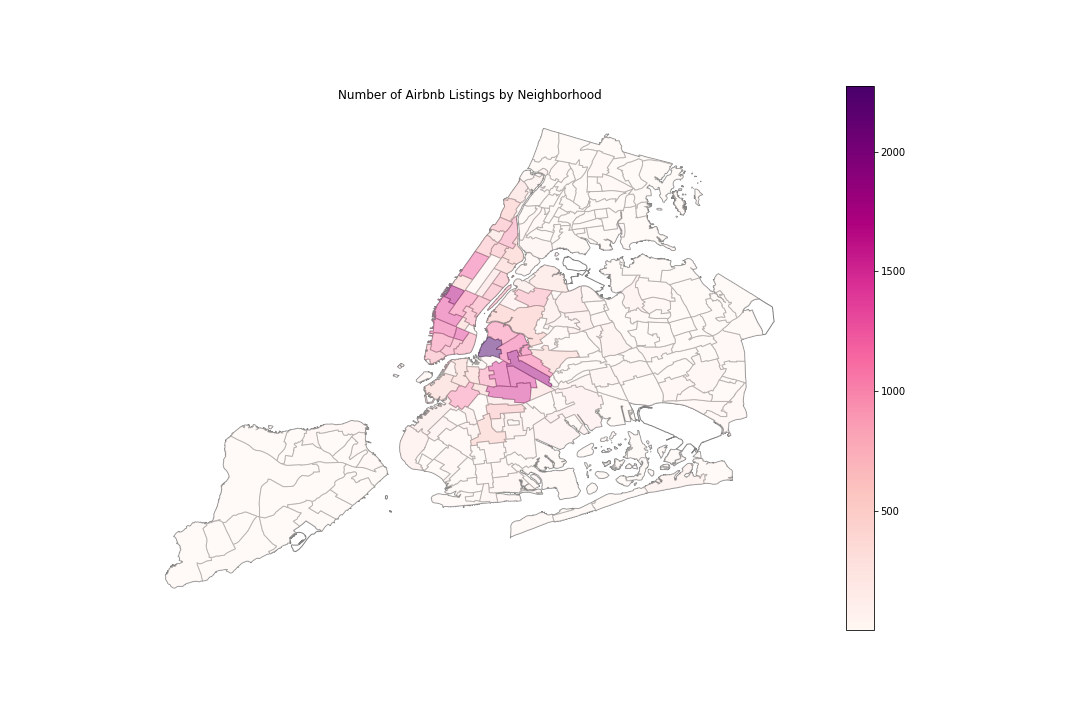

In [251]:
Image('nr_listings_by_neighbourhood.png')

Some neighbourhoods of Manhattan and Brooklyn have more airbnbs than others. The question is why?

Let's have a look at google maps and see if there are tourist attractions in the neighbourhoods with high color intensity.

Next, we display our findings. We also show the lines delimiting the different neighbourhoods for an easier comparison.

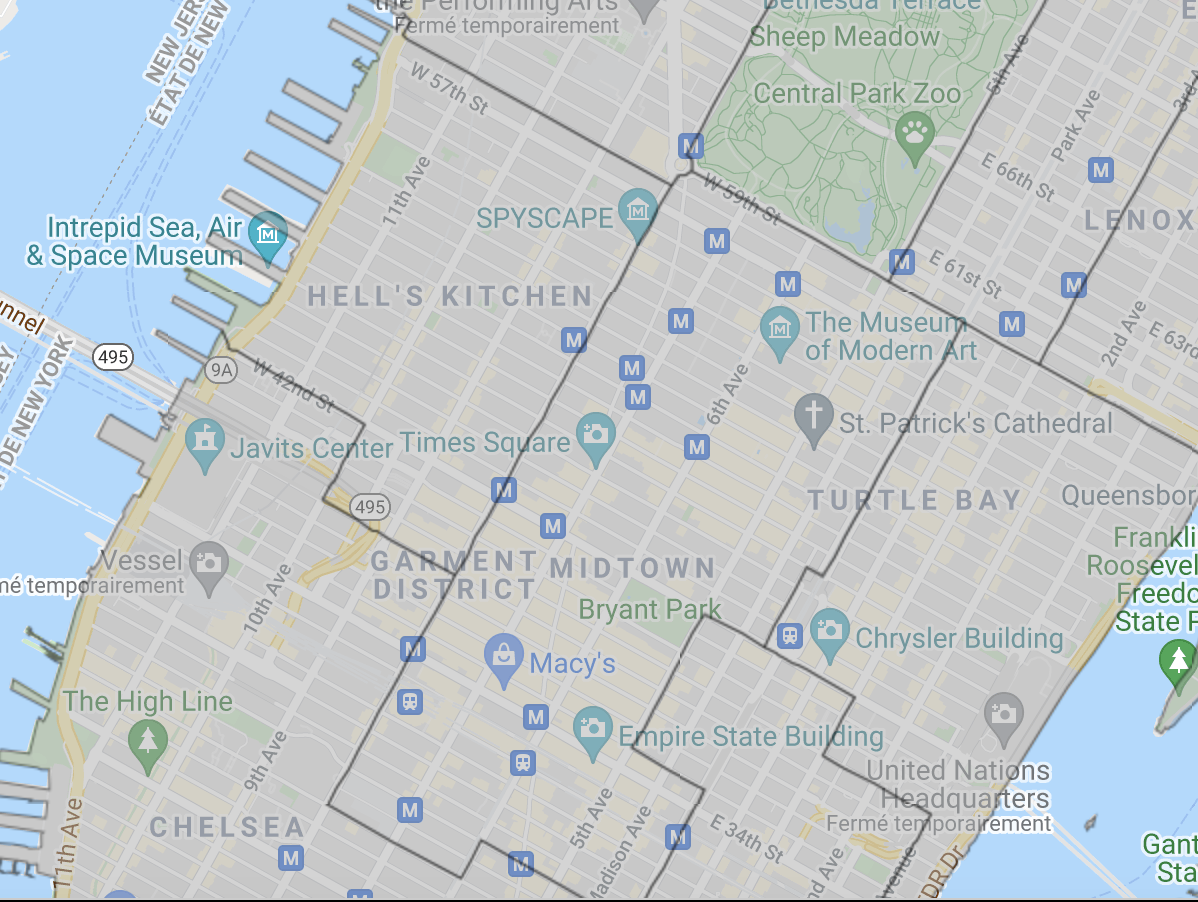

In [252]:
Image("img1.png")

The proximity to tourist attractions like the Central Park, Times Square, the Museum of Modern Art, Chrysler Building, Empire State Building, etc. may explain the reason why the number of airbnbs is so high in these neighbourhoods.Indeed, a lot of tourists may want to be close to the places they want to visit during their stay.

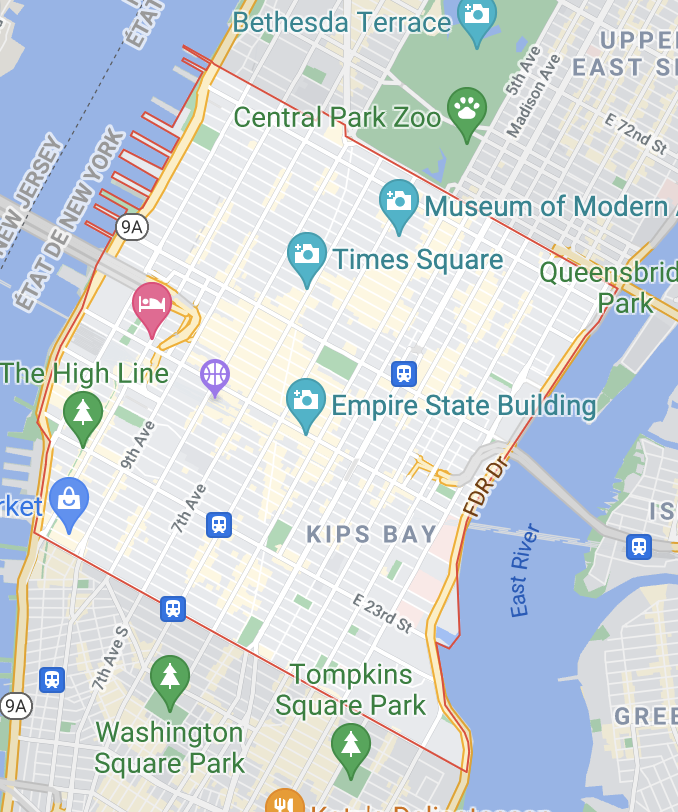

In [253]:
Image("img2.png")

Furthermore, after a quick google search on "What is the best area in New York?", the search engine gives us the following result "Midtown: Ideal for your first visit to New York.". Midtown is the area represented in the image above and you can see that it corresponds to the neighbourhoods with the highest number of airbnbs. This makes perfect sense, in order to make profits, if there is a high demand, there should be a high supply :)

To further dig into the host's behaviour, we wanted to see who takes advantage of this platform (Airbnb) the most. 

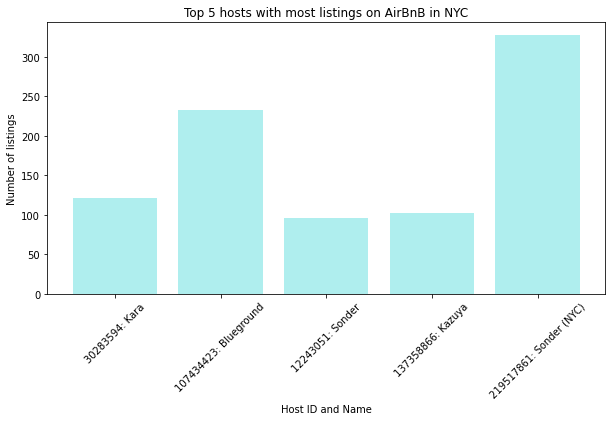

In [254]:
Image("top_hosts.png")

Sonder has more than 300 listings on airbnb in New York. This made us curious about whether they are situated throughout all NYC or concentrated in a given region.

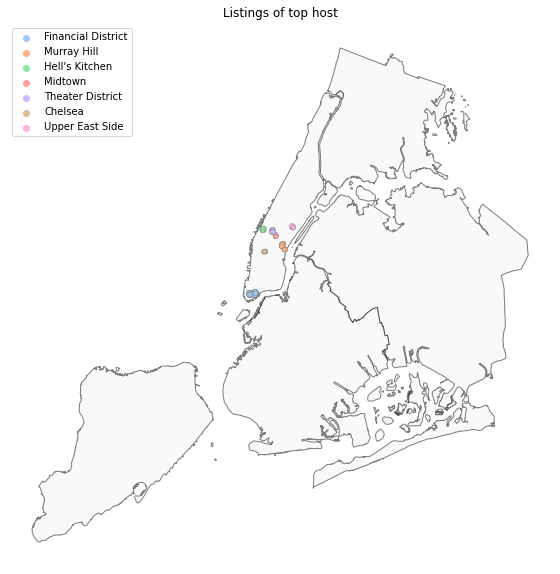

In [255]:
Image('listings_top_host.png')

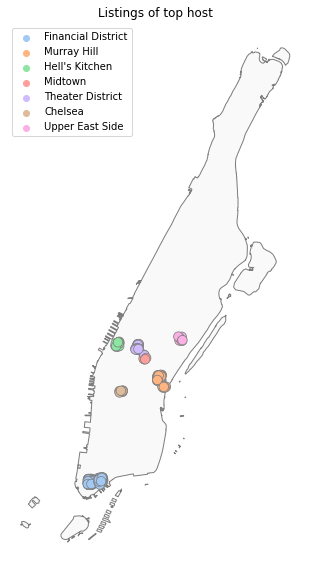

In [256]:
Image("manhattan_listings_top_host.png")

These 2 visualisations show that the top host has airbnbs only in Manhattan. Furthermore, they help us predict that the top host owns several apartments in a given building, or that he/she rent several rooms in a given apartment/house because there are several circles very close to each other and of the same colour.

The next graph, allows us to compare the prices for different room types in the 5 boroughs. A key finding is that Manhattan not only is the area with the highest number of airbnbs, but also the most expensive region for all types of rooms.

In [3]:
from IPython.display import IFrame

IFrame(src='https://nbviewer.jupyter.org/github/cecilieesj/AirbnbNY/blob/master/Room_type_price.html', width=900, height=450)

So there are a lot of airbnbs in Manhattan and they are relatively expensive, but how busy are they during the year?

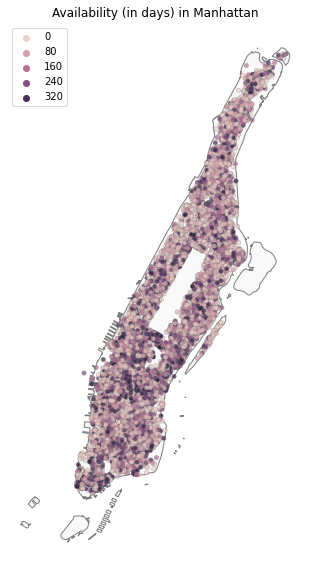

In [258]:
Image('availability.png')

Looks like a majority of this huge number of expensive airbnbs are pretty much booked all year round :) 

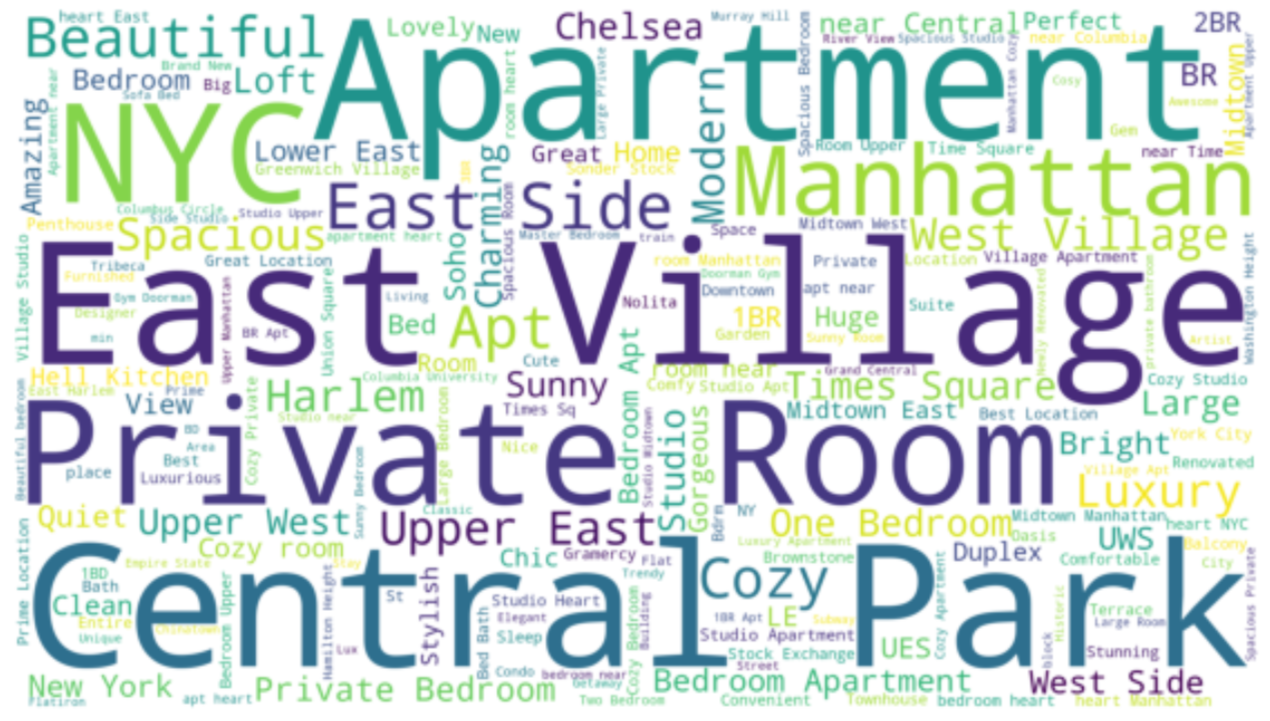

In [259]:
Image('WordCloud_.png')

The wordcloud above illustrates the naming strategy of the hosts and shows that their goal is to use clear keywords that describe the position and the airbnb itself. This strategy seems to attract a lot of clients.

## 6. Discussion

In our opinion, we were able to relatively easily find a story to tell after some exploratory analysis on the data. We have discovered some interesting insights from the data, and each and every step has been explained clearly. We did encounter some difficulties when we imported the new data set on the neighbourhoods, but managed to find a solution. Also, we did not find an explanation on why the number of airbnbs is highest in a Brooklyn neighbourhood. Therefore, this part could be imporoved. 

Moreover, when we were working to predict price with the machine learning algorithms, we ignored some important features like *room_type* while cleaning the data. To get the best result it may necessary to take this feature into account. We also need to use natural language processing(NLP) for converting guest comments, host descriptions to obtain more information for optimization purpose. There was a need to explore and experiment with the XG Boost and Artificial Neural Network(ANN) to find the best model.

## 7. Contributions

### 7.1 Mihaela Berezantev (s201447)

Mihaela Berezantev worked on the basic stats part for the video and made the video itself. She also worked on the narrative story which includes creating the visualisations and data analysis. As for the final explanatory notebook, she took care of the follwoing parts: 2.Basic Stats, 3.Data Analysis (except the Machine Learning part) and 5.Visualizations.

### 7.2 Cecilie Jürgens (s173673)

Cecilie Jürgens have build the entire webpage and written all the text in it. Also she has made some parts of the data preprocessing of the machine learning. As for the final explanatory notebook, she took care of the follwoing parts: 1.Motivation and 4.Genre. She also has read through and edited the whole explanatory notebook.

### 7.3 Md Shariful Alam (s210703)

Md Shariful Alam have made the machine learning part. As for the final explanatory notebook, he took care of the follwoing parts: 3.Data Analysis (the Machine Learning part) and 6.Discussion.

## 8. References

​[1] Kaggle, New York City Airbnb Open Data, 2019, Last visited 11/05/21.
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/tasks?taskId=181


[2] NYC Open Data, Neighborhood Tabulation Areas (NTA), 2021, Last visited 11/05/21.
https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq


[3] Kaggle, Maps of NYC Airbnbs with Python, 2019, Last visited 11/05/21.
https://www.kaggle.com/geowiz34/maps-of-nyc-airbnbs-with-python


[4] Kaggle, Predicting Price of Airbnb Listings in NYC, 2019, Last visited 11/05/21.
https://www.kaggle.com/spuchalski/predicting-price-of-airbnb-listings-in-nyc



[5] Kaggle, Airbnb NYC model, 2020, Last visited 11/05/21.
https://www.kaggle.com/lumierebatalong/airbnb-nyc-model